In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/Illalla/helper_functions_for_tf/main/helper_functions.py

--2022-06-08 09:15:59--  https://raw.githubusercontent.com/Illalla/helper_functions_for_tf/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5104 (5.0K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   4.98K  --.-KB/s    in 0s      

2022-06-08 09:16:00 (69.8 MB/s) - ‘helper_functions.py’ saved [5104/5104]



In [3]:
from helper_functions import *

In [4]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-7d07ea64-6084-8000-991a-260b04251f92)


In [5]:
from zipfile import ZipFile
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
zip_ref = ZipFile('nlp_getting_started.zip')
zip_ref.extractall()
zip_ref.close()

--2022-06-08 09:16:00--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2022-06-08 09:16:00 (142 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [6]:
import pandas as pd

In [7]:
df_train = pd.read_csv('/content/train.csv')

In [8]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [9]:
train_df_shuffled = df_train.sample(frac=1)

In [10]:
train_df_shuffled.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
import random
random_index = random.randint(0, len(train_df_shuffled)-5)
for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print('Disaster' if target==1 else 'Not a disaster')
  print(f'\n {text} \n')

Not a disaster

 @Casper_rmg @BestComedyVine whats cracking cuz 

Disaster

 Notley's tactful yet very direct response to Harper's attack on Alberta's gov't. Hell YEAH Premier! http://t.co/rzSUlzMOkX #ableg #cdnpoli 

Not a disaster

 I understand why broke ppl be mad or always hav an attitude now this sht ain't no fun i won't be desolate for long 

Disaster

 Slow clap for this pilot. Dramatic Video Shows Plane Landing During Violent Storm http://t.co/CgVUY3RcxO 

Disaster

 Tension In Bayelsa As Patience Jonathan Plans To Hijack APC PDP http://t.co/qxXN6RKsp6 http://t.co/B3X1wqzAoR 



In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(), train_df_shuffled['target'].to_numpy(), test_size=0.1)

In [14]:
train_sentences

array(['Eh hello cover your bloody thighs your bloody cleav... \x89ÛÓ Eh hello! Since when do i expose my cleavage and i on... http://t.co/Kv5L4PPXfG',
       'BREAKING: Terror Attack On\nPolice Post #Udhampur',
       'DTN India: Rly tragedy in MP: Some live to recount horror: \x89ÛÏWhen I saw coaches of my train plunging into water... http://t.co/WK63tm34a0',
       ...,
       'All Hail Lady Cheryl!! 24 Reasons You Should Be Obsessed With Cheryl Cole http://t.co/kigy7M6bGJ',
       'GEARS OF WAR 1!(preview member) Come chat! XB1! Welcome to the DANGER zone!: http://t.co/6SdgZ5DXNt',
       '#hot  Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/nQiObcZKrT #prebreak #best'],
      dtype=object)

In [15]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [16]:
text_vectorizer = TextVectorization(max_tokens=None, #how many words is in dictionary. None= no cap
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None)

In [17]:
train_sentences

array(['Eh hello cover your bloody thighs your bloody cleav... \x89ÛÓ Eh hello! Since when do i expose my cleavage and i on... http://t.co/Kv5L4PPXfG',
       'BREAKING: Terror Attack On\nPolice Post #Udhampur',
       'DTN India: Rly tragedy in MP: Some live to recount horror: \x89ÛÏWhen I saw coaches of my train plunging into water... http://t.co/WK63tm34a0',
       ...,
       'All Hail Lady Cheryl!! 24 Reasons You Should Be Obsessed With Cheryl Cole http://t.co/kigy7M6bGJ',
       'GEARS OF WAR 1!(preview member) Come chat! XB1! Welcome to the DANGER zone!: http://t.co/6SdgZ5DXNt',
       '#hot  Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/nQiObcZKrT #prebreak #best'],
      dtype=object)

In [18]:
a = 0
for i in train_sentences:
  a += len(i.split(' '))
average_tokens = a / len(train_sentences)

In [19]:
average_tokens

14.938987009195738

In [20]:
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [21]:
text_vectorizer.adapt(train_sentences)

In [22]:
text_vectorizer(['I don\'t like this situation.'])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   8,   63,   25,   19, 1472,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [23]:
random_sentence = random.choice(train_sentences)

In [24]:
random_sentence

'#RaheelSharif is manifesting how one RIGHT man at the helm can save a Sinking Ship engulfed in a Dark-Stormy-Tidal-Sea. Well Done.'

In [25]:
text_vectorizer([random_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[9381,    9,    1,   62,   58,  176,   90,   17,    2,    1,   69,
         312,    3,  286,  763]])>

In [26]:
words_in_vocab = text_vectorizer.get_vocabulary()

In [27]:
words_in_vocab

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'that',
 'it',
 'at',
 'by',
 'this',
 'from',
 'was',
 'be',
 'are',
 'have',
 'like',
 'me',
 'up',
 'as',
 'just',
 'but',
 'so',
 'im',
 'amp',
 'not',
 'your',
 'its',
 'out',
 'all',
 'after',
 'no',
 'fire',
 'will',
 'has',
 'if',
 'an',
 'when',
 'we',
 'new',
 'via',
 'now',
 'get',
 'more',
 'about',
 'or',
 'he',
 'what',
 'they',
 'one',
 'people',
 'been',
 'news',
 'how',
 'dont',
 'over',
 'into',
 'who',
 'video',
 'were',
 'can',
 'us',
 'do',
 '2',
 'emergency',
 'disaster',
 'there',
 'than',
 'some',
 'police',
 'her',
 'would',
 'his',
 'body',
 'burning',
 'crash',
 'back',
 'still',
 'time',
 'storm',
 'suicide',
 'man',
 'got',
 'california',
 'buildings',
 'them',
 'know',
 'had',
 'off',
 'why',
 'rt',
 'going',
 'first',
 'world',
 'day',
 'bomb',
 'love',
 'nuclear',
 'two',
 'killed',
 'cant',
 'train',
 'go',
 'youtube',
 'see',
 'our',
 '3',
 't

In [28]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             input_length=max_length)

In [29]:
print(f'{random_sentence}\n\n Embedded version:{embedding(text_vectorizer(random_sentence))}')
print(f'{embedding(text_vectorizer(random_sentence)).shape}')

#RaheelSharif is manifesting how one RIGHT man at the helm can save a Sinking Ship engulfed in a Dark-Stormy-Tidal-Sea. Well Done.

 Embedded version:[[ 0.00631506 -0.00536979  0.01422581 ...  0.00172833 -0.03680772
  -0.03518267]
 [ 0.04031152 -0.03507446  0.03807951 ... -0.01519139 -0.00055876
   0.03249997]
 [-0.04525049 -0.03353196 -0.00596938 ... -0.02699468 -0.01274418
   0.02650349]
 ...
 [-0.00561292 -0.02603154  0.00967668 ...  0.00755248  0.01998756
  -0.02931563]
 [ 0.01225638  0.00035056 -0.0496177  ...  0.00226849 -0.02605829
   0.02058626]
 [-0.00507375 -0.01522983  0.02545596 ... -0.04455155  0.04129472
   0.01737192]]
(15, 128)


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

model_0 = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('clf', MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [31]:
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score

0.8293963254593176

In [32]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [33]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
def binary_classification_scores(y_true, y_preds):
  # Shows accuracy, precision, recall and f1-score
  print(f"""Accuracy: {accuracy_score(y_true, y_preds)}
Precision: {precision_score(y_true, y_preds)}
Recall: {recall_score(y_true, y_preds)}
F1_score: {f1_score(y_true, y_preds)}""")

In [34]:
binary_classification_scores(val_labels, baseline_preds)

Accuracy: 0.8293963254593176
Precision: 0.9152542372881356
Recall: 0.6625766871165644
F1_score: 0.7686832740213523


In [35]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs)

In [36]:
model_1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [37]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-train

In [38]:
model_1_history = model_1.fit(train_sentences, train_labels, epochs=5, validation_data=(val_sentences, val_labels), callbacks=[create_tb_callback('CNN_1', 'experiments')])

Epoch 1/5
215/215 [==============================] - 13s 14ms/step - loss: 0.6159 - accuracy: 0.6843 - val_loss: 0.5105 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4492 - accuracy: 0.8139 - val_loss: 0.4113 - val_accuracy: 0.8268
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3537 - accuracy: 0.8596 - val_loss: 0.3908 - val_accuracy: 0.8307
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2901 - accuracy: 0.8866 - val_loss: 0.3912 - val_accuracy: 0.8346
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2413 - accuracy: 0.9108 - val_loss: 0.4032 - val_accuracy: 0.8268


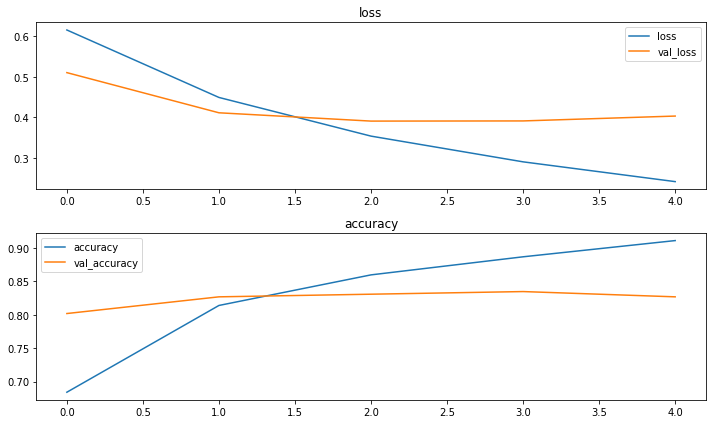

In [39]:
plot_loss_curves(model_1_history)

In [40]:
model_1_preds = tf.round(tf.squeeze(model_1.predict(val_sentences)))

In [41]:
binary_classification_scores(val_labels, model_1_preds)

Accuracy: 0.8267716535433071
Precision: 0.8415492957746479
Recall: 0.7331288343558282
F1_score: 0.7836065573770491


In [42]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab)

10000

In [43]:
embed_weights = model_1.get_layer('embedding').get_weights()[0]
embed_weights

array([[ 0.03500928,  0.01446934,  0.04072616, ..., -0.00586116,
         0.02749667,  0.00835532],
       [-0.04981109, -0.03360385, -0.00708462, ..., -0.02563532,
        -0.02004058,  0.03166411],
       [ 0.0048969 , -0.00988207, -0.04074307, ..., -0.02642255,
        -0.01098131,  0.00290589],
       ...,
       [ 0.05668994,  0.05925461,  0.08580887, ..., -0.10278773,
         0.10623459, -0.04734999],
       [-0.07431681, -0.08859541, -0.08087185, ...,  0.03712862,
        -0.10855644,  0.03085047],
       [ 0.09631263,  0.1050742 ,  0.08889434, ..., -0.01842288,
         0.05387398, -0.0076967 ]], dtype=float32)

In [44]:
# import io
# out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
# out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

# for index, word in enumerate(words_in_vocab):
#   if index == 0:
#     continue  # skip 0, it's padding.
#   vec = embed_weights[index]
#   out_v.write('\t'.join([str(x) for x in vec]) + "\n")
#   out_m.write(word + "\n")
# out_v.close()
# out_m.close()

In [45]:
# try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except Exception:
#   pass

### LSTM

LSTM - long short term memory

In [46]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs)

In [47]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2 = model_2.fit(train_sentences, train_labels, epochs=5, callbacks=[create_tb_callback('first_RNN', 'experiments')], validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 10s 12ms/step - loss: 0.2324 - accuracy: 0.9165 - val_loss: 0.4766 - val_accuracy: 0.8163
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1608 - accuracy: 0.9397 - val_loss: 0.5603 - val_accuracy: 0.8228
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1326 - accuracy: 0.9499 - val_loss: 0.7069 - val_accuracy: 0.8058
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1083 - accuracy: 0.9574 - val_loss: 0.6848 - val_accuracy: 0.8045
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0934 - accuracy: 0.9650 - val_loss: 0.8166 - val_accuracy: 0.7940


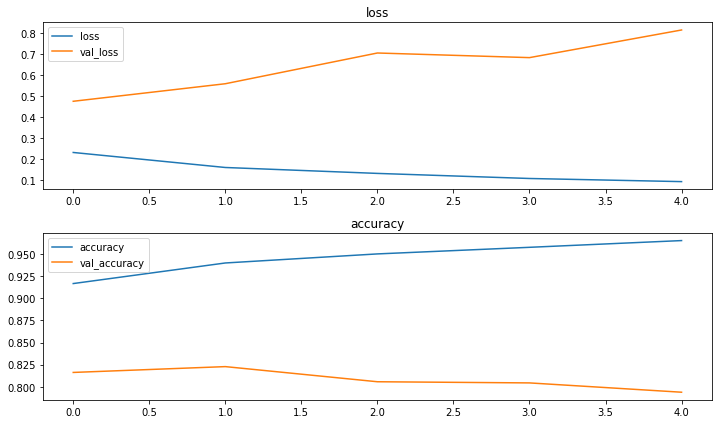

In [48]:
plot_loss_curves(history_2)

In [49]:
binary_classification_scores(tf.round(model_2.predict(val_sentences)), val_labels)

Accuracy: 0.7939632545931758
Precision: 0.7055214723926381
Recall: 0.7903780068728522
F1_score: 0.7455429497568882


In [50]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                           

In [51]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_3 = tf.keras.Model(inputs, outputs)

model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_3 = model_3.fit(train_sentences, train_labels, epochs=5, callbacks=[create_tb_callback('GRU', 'experiments')], validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 5s 11ms/step - loss: 0.1459 - accuracy: 0.9453 - val_loss: 0.7285 - val_accuracy: 0.7887
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0896 - accuracy: 0.9675 - val_loss: 0.6900 - val_accuracy: 0.7940
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0722 - accuracy: 0.9704 - val_loss: 0.9559 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0605 - accuracy: 0.9736 - val_loss: 1.0323 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0558 - accuracy: 0.9733 - val_loss: 1.0911 - val_accuracy: 0.8058


In [52]:
binary_classification_scores(val_labels, tf.round(model_3.predict(val_sentences)))

Accuracy: 0.8057742782152231
Precision: 0.8068965517241379
Recall: 0.7177914110429447
F1_score: 0.7597402597402596


### Biderectional RNN

In [53]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_4 = tf.keras.Model(inputs, outputs)

model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_4 = model_4.fit(train_sentences, train_labels, epochs=5, validation_data=(val_sentences, val_labels), callbacks=[create_tb_callback('Bidirectional', 'experiments')])

Epoch 1/5
215/215 [==============================] - 9s 19ms/step - loss: 0.1009 - accuracy: 0.9691 - val_loss: 0.8657 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0548 - accuracy: 0.9755 - val_loss: 1.0449 - val_accuracy: 0.7940
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0496 - accuracy: 0.9758 - val_loss: 1.2333 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0502 - accuracy: 0.9765 - val_loss: 1.1523 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0447 - accuracy: 0.9801 - val_loss: 0.9890 - val_accuracy: 0.7848


In [54]:
binary_classification_scores(val_labels, tf.round(model_4.predict(val_sentences)))

Accuracy: 0.7847769028871391
Precision: 0.7682119205298014
Recall: 0.7116564417177914
F1_score: 0.7388535031847134


In [55]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(32, 3, activation='relu', padding='valid')(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs)

model_5.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [56]:
history_5 = model_5.fit(train_sentences, train_labels, epochs=5, validation_data=(val_sentences, val_labels), callbacks=[create_tb_callback('CNNconv1D', 'experiments')])

Epoch 1/5
215/215 [==============================] - 9s 6ms/step - loss: 0.1629 - accuracy: 0.9504 - val_loss: 0.7166 - val_accuracy: 0.7953
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0905 - accuracy: 0.9676 - val_loss: 0.8439 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0694 - accuracy: 0.9730 - val_loss: 0.9359 - val_accuracy: 0.7940
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0590 - accuracy: 0.9752 - val_loss: 1.0363 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0561 - accuracy: 0.9746 - val_loss: 1.0708 - val_accuracy: 0.7874


In [57]:
binary_classification_scores(val_labels, tf.round(model_5.predict(val_sentences)))

Accuracy: 0.7874015748031497
Precision: 0.7578616352201258
Recall: 0.7392638036809815
F1_score: 0.7484472049689441


In [58]:
import tensorflow_hub as hub

encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                               input_shape=[],
                               dtype=tf.string,
                               trainable=False)

In [59]:
model_6 = tf.keras.Sequential([
                               encoder_layer,
                               layers.Dense(512, activation='relu'),
                               layers.Dense(1, activation='sigmoid')
])

In [60]:
model_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_6 = model_6.fit(train_sentences, train_labels, epochs=5, validation_data=(val_sentences, val_labels), callbacks=[create_tb_callback('FeatureExtraction', 'experiments')])

Epoch 1/5
215/215 [==============================] - 7s 18ms/step - loss: 0.4682 - accuracy: 0.7867 - val_loss: 0.3996 - val_accuracy: 0.8163
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4019 - accuracy: 0.8259 - val_loss: 0.4038 - val_accuracy: 0.8241
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3789 - accuracy: 0.8336 - val_loss: 0.4053 - val_accuracy: 0.8215
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3546 - accuracy: 0.8462 - val_loss: 0.4104 - val_accuracy: 0.8281
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3281 - accuracy: 0.8602 - val_loss: 0.4164 - val_accuracy: 0.8333


In [61]:
binary_classification_scores(val_labels, tf.round(model_6.predict(val_sentences)))

Accuracy: 0.8333333333333334
Precision: 0.8754716981132076
Recall: 0.7116564417177914
F1_score: 0.7851099830795262


# Smol

In [62]:
train_10_percent = train_df_shuffled[['text', 'target']].sample(frac=0.1)
# DATA LEAKAGE!

In [63]:
train_10_percent['target'].value_counts()

0    429
1    332
Name: target, dtype: int64

In [64]:
train_df_shuffled['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [65]:
model_7 = tf.keras.Sequential([
                               encoder_layer,
                               layers.Dense(512, activation='relu'),
                               layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_7 = model_7.fit(train_10_percent['text'], train_10_percent['target'], epochs=5, validation_data=(val_sentences, val_labels), callbacks=[create_tb_callback('10%featureextractionLEAK', 'experiments')])
# DATA LEAKAGE!

Epoch 1/5
24/24 [==============================] - 2s 40ms/step - loss: 0.6217 - accuracy: 0.7635 - val_loss: 0.5324 - val_accuracy: 0.8150
Epoch 2/5
24/24 [==============================] - 1s 25ms/step - loss: 0.4565 - accuracy: 0.8344 - val_loss: 0.4338 - val_accuracy: 0.8084
Epoch 3/5
24/24 [==============================] - 1s 25ms/step - loss: 0.3663 - accuracy: 0.8515 - val_loss: 0.4124 - val_accuracy: 0.8176
Epoch 4/5
24/24 [==============================] - 1s 25ms/step - loss: 0.3168 - accuracy: 0.8725 - val_loss: 0.4112 - val_accuracy: 0.8163
Epoch 5/5
24/24 [==============================] - 1s 24ms/step - loss: 0.2820 - accuracy: 0.9014 - val_loss: 0.4197 - val_accuracy: 0.8136


In [66]:
binary_classification_scores(val_labels, tf.round(model_7.predict(val_sentences)))

Accuracy: 0.8136482939632546
Precision: 0.7987012987012987
Recall: 0.754601226993865
F1_score: 0.7760252365930599


In [67]:
train_sentences_10_percent, train_labels_10_percent = train_sentences[:int(len(train_sentences)/10)], train_labels[:int(len(train_labels)/10)]

In [68]:
model_8 = tf.keras.models.clone_model(model_7)
model_8.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_8 = model_8.fit(train_sentences_10_percent, train_labels_10_percent, epochs=5, validation_data=(val_sentences, val_labels), callbacks=[create_tb_callback('10%featureextraction', 'experiments')])


Epoch 1/5
22/22 [==============================] - 4s 44ms/step - loss: 0.6287 - accuracy: 0.7431 - val_loss: 0.5492 - val_accuracy: 0.8031
Epoch 2/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4786 - accuracy: 0.8015 - val_loss: 0.4506 - val_accuracy: 0.8150
Epoch 3/5
22/22 [==============================] - 0s 22ms/step - loss: 0.3951 - accuracy: 0.8161 - val_loss: 0.4306 - val_accuracy: 0.8176
Epoch 4/5
22/22 [==============================] - 1s 26ms/step - loss: 0.3425 - accuracy: 0.8438 - val_loss: 0.4341 - val_accuracy: 0.8045
Epoch 5/5
22/22 [==============================] - 0s 21ms/step - loss: 0.3069 - accuracy: 0.8861 - val_loss: 0.4450 - val_accuracy: 0.8031


In [69]:
#!tensorboard dev upload --logdir 'experiments'

In [70]:
#!tensorboard dev list

In [71]:
model_6.save('model_NLP.h5')

In [72]:
loaded_model = tf.keras.models.load_model('model_NLP.h5',
                                          custom_objects={'KerasLayer': hub.KerasLayer})

In [73]:
def plot_wrong(test_sentences,  test_labels, model):
  y_preds = tf.squeeze(model.predict(test_sentences))
  y_preds_binary = tf.round(y_preds)
  df = pd.DataFrame({'Sentences': test_sentences, 'True Labels': test_labels, 'Pred Labels': y_preds_binary, 'Pred Probabilities': y_preds})
  df_wrong = df[df['True Labels'] != df['Pred Labels']]
  df_wrong['Difference'] = abs(df_wrong['True Labels']-df_wrong['Pred Probabilities'])
  df_wrong = df_wrong.sort_values('Difference', ascending=True, ignore_index=True)
  return df_wrong

In [74]:
val_sentences.shape, val_labels.shape, tf.squeeze(tf.round(model_7.predict(val_sentences))).shape

((762,), (762,), TensorShape([762]))

In [75]:
y_preds = tf.squeeze(model_6.predict(val_sentences))
y_preds_binary = tf.round(y_preds)
df = pd.DataFrame({'Sentences': val_sentences, 'True Labels': val_labels, 'Pred Labels': y_preds_binary, 'Pred Probabilities': y_preds})
df_wrong = df[df['True Labels'] != df['Pred Labels']]
for i in df_wrong.iloc:
  print(i)

Sentences             Even if u have your weapon and your badge we g...
True Labels                                                           1
Pred Labels                                                         0.0
Pred Probabilities                                             0.030052
Name: 1, dtype: object
Sentences             I've just posted on my Blog about: Criminals W...
True Labels                                                           1
Pred Labels                                                         0.0
Pred Probabilities                                             0.152361
Name: 15, dtype: object
Sentences             @steveycheese99 @MapMyRun where you being elec...
True Labels                                                           0
Pred Labels                                                         1.0
Pred Probabilities                                             0.611046
Name: 17, dtype: object
Sentences             Is it seclusion when a class is evacuated a

In [76]:
plot_wrong(val_sentences, val_labels, model_6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sentences,True Labels,Pred Labels,Pred Probabilities,Difference
0,#Newswatch: 2 vehicles collided at Lock and La...,1,0.0,0.492006,0.507994
1,#Newswatch: 2 vehicles collided at Lock and La...,1,0.0,0.492006,0.507994
2,#pakistan#news# PAKPATTAN City News: Man elect...,1,0.0,0.491622,0.508378
3,@alextucker VOLCANO BOWL DRINK,1,0.0,0.484292,0.515708
4,Trafford Centre film fans angry after Odeon ci...,1,0.0,0.483972,0.516028
...,...,...,...,...,...
122,Even if u have your weapon and your badge we g...,1,0.0,0.030052,0.969948
123,I liked a @YouTube video http://t.co/43sXG9Z6x...,1,0.0,0.026953,0.973047
124,SANDSTORM!!! WOO HOO!!,1,0.0,0.023466,0.976534
125,@SwellyJetEvo Disneyland! Tacos there are bomb!,1,0.0,0.019903,0.980097


In [77]:
test_df = pd.read_csv('test.csv')
test_text = test_df['text'].to_list()
test_text[:5]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan']

In [78]:
def make_pred_df(model, text_data):
  preds = tf.squeeze(model.predict(text_data))
  preds_binary = tf.round(preds)
  return pd.DataFrame({'Text': text_data, 'Predictions': preds_binary, 'Pred probs': preds})

In [79]:
make_pred_df(model_6, test_text)

,Text,Predictions,Pred probs
0,Just happened a terrible car crash,0.0,0.480369
1,"Heard about #earthquake is different cities, s...",1.0,0.907455
2,"there is a forest fire at spot pond, geese are...",1.0,0.792180
3,Apocalypse lighting. #Spokane #wildfires,1.0,0.970423
4,Typhoon Soudelor kills 28 in China and Taiwan,1.0,0.988646
...,...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1.0,0.731833
3259,Storm in RI worse than last hurricane. My city...,1.0,0.987626
3260,Green Line derailment in Chicago http://t.co/U...,1.0,0.975765
3261,MEG issues Hazardous Weather Outlook (HWO) htt...,1.0,0.829420


In [80]:
import time
def time_pred(model, data):
  start = time.perf_counter()
  model.predict(data)
  end = time.perf_counter()
  return end-start

In [81]:
time_pred(model_6, val_sentences)

0.39977747499995075

In [82]:
time_pred(model_0, val_sentences)

0.0721881150000172